In [1]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d imdevskp/corona-virus-report


Dataset URL: https://www.kaggle.com/datasets/imdevskp/corona-virus-report
License(s): other
 42% 8.00M/19.0M [00:00<00:00, 83.3MB/s]
100% 19.0M/19.0M [00:00<00:00, 128MB/s] 


In [3]:
!unzip corona-virus-report.zip

Archive:  corona-virus-report.zip
  inflating: country_wise_latest.csv  
  inflating: covid_19_clean_complete.csv  
  inflating: day_wise.csv            
  inflating: full_grouped.csv        
  inflating: usa_county_wise.csv     
  inflating: worldometer_data.csv    


In [4]:
import pandas as pd
df = pd.read_csv('/content/full_grouped.csv')
df.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


# **EDA**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [19]:
df.isna().sum()

,0
Date,0
Country/Region,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
WHO Region,0


In [6]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
std,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852
min,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000


In [7]:
df["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Grenada', 'Guatemala', 'Guinea', 'G

In [8]:
len(df["Country/Region"].unique())

187

In [9]:

df['Date'] = pd.to_datetime(df['Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            35156 non-null  datetime64[ns]
 1   Country/Region  35156 non-null  object        
 2   Confirmed       35156 non-null  int64         
 3   Deaths          35156 non-null  int64         
 4   Recovered       35156 non-null  int64         
 5   Active          35156 non-null  int64         
 6   New cases       35156 non-null  int64         
 7   New deaths      35156 non-null  int64         
 8   New recovered   35156 non-null  int64         
 9   WHO Region      35156 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 2.7+ MB


In [10]:

print(df['Date'].dt.year.unique())
print(df['Date'].dt.month.unique())
print(df['Date'].dt.day.unique())


[2020]
[1 2 3 4 5 6 7]
[22 23 24 25 26 27 28 29 30 31  1  2  3  4  5  6  7  8  9 10 11 12 13 14
 15 16 17 18 19 20 21]


In [11]:
df[df['Date'].dt.month==1]

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
1865,2020-01-31,West Bank and Gaza,0,0,0,0,0,0,0,Eastern Mediterranean
1866,2020-01-31,Western Sahara,0,0,0,0,0,0,0,Africa
1867,2020-01-31,Yemen,0,0,0,0,0,0,0,Eastern Mediterranean
1868,2020-01-31,Zambia,0,0,0,0,0,0,0,Africa


## date and confirm

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
sum=[]
for i in df['Date'].dt.month.unique():
  sum.append(df[df['Date'].dt.month==i]['Confirmed'].sum())
date_month=pd.DataFrame(df['Date'].dt.month.unique(),columns=['month'])
date_month['sum']=sum
date_month

,month,sum
0,1,38534
1,2,1663437
2,3,9002815
3,4,63391662
4,5,144990399
5,6,246525787
6,7,362895848


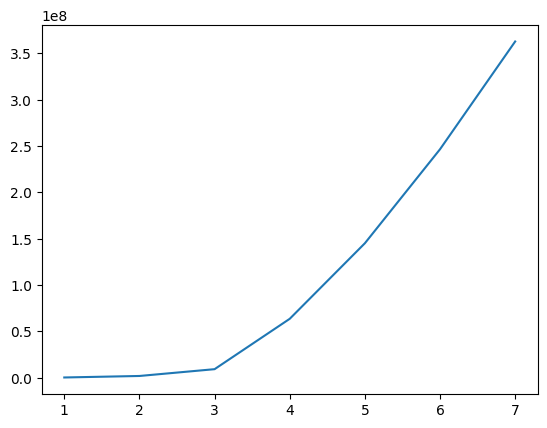

In [14]:
plt.plot(df['Date'].dt.month.unique(),sum)

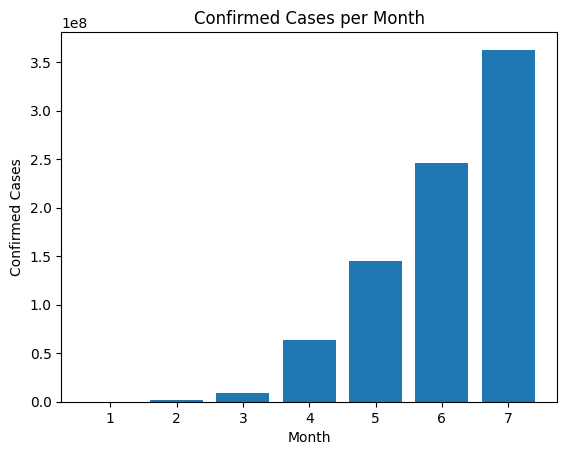

In [15]:

plt.bar(df['Date'].dt.month.unique(), sum)
plt.xlabel("Month")
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases per Month")
plt.show()


### first countries have vires

in month one

In [16]:
df[df['Date'].dt.month==1][df[df['Date'].dt.month==1]['Confirmed']!=0].iloc[:,:3]['Country/Region'].unique()

array(['China', 'Japan', 'South Korea', 'Taiwan*', 'Thailand', 'US',
       'Singapore', 'Vietnam', 'France', 'Malaysia', 'Nepal', 'Australia',
       'Canada', 'Cambodia', 'Germany', 'Sri Lanka', 'Finland',
       'United Arab Emirates', 'India', 'Philippines', 'Italy', 'Russia',
       'Sweden', 'United Kingdom'], dtype=object)

In [17]:
df[df['Date'].dt.month==1][df[df['Date'].dt.month==1]['Confirmed']!=0].iloc[:,:3].sort_values('Confirmed',ascending=False)

,Date,Country/Region,Confirmed
1719,2020-01-31,China,9802
1532,2020-01-30,China,8141
1345,2020-01-29,China,6087
1158,2020-01-28,China,5509
971,2020-01-27,China,2877
...,...,...,...
965,2020-01-27,Cambodia,1
1713,2020-01-31,Cambodia,1
1526,2020-01-30,Cambodia,1
1280,2020-01-28,Sri Lanka,1


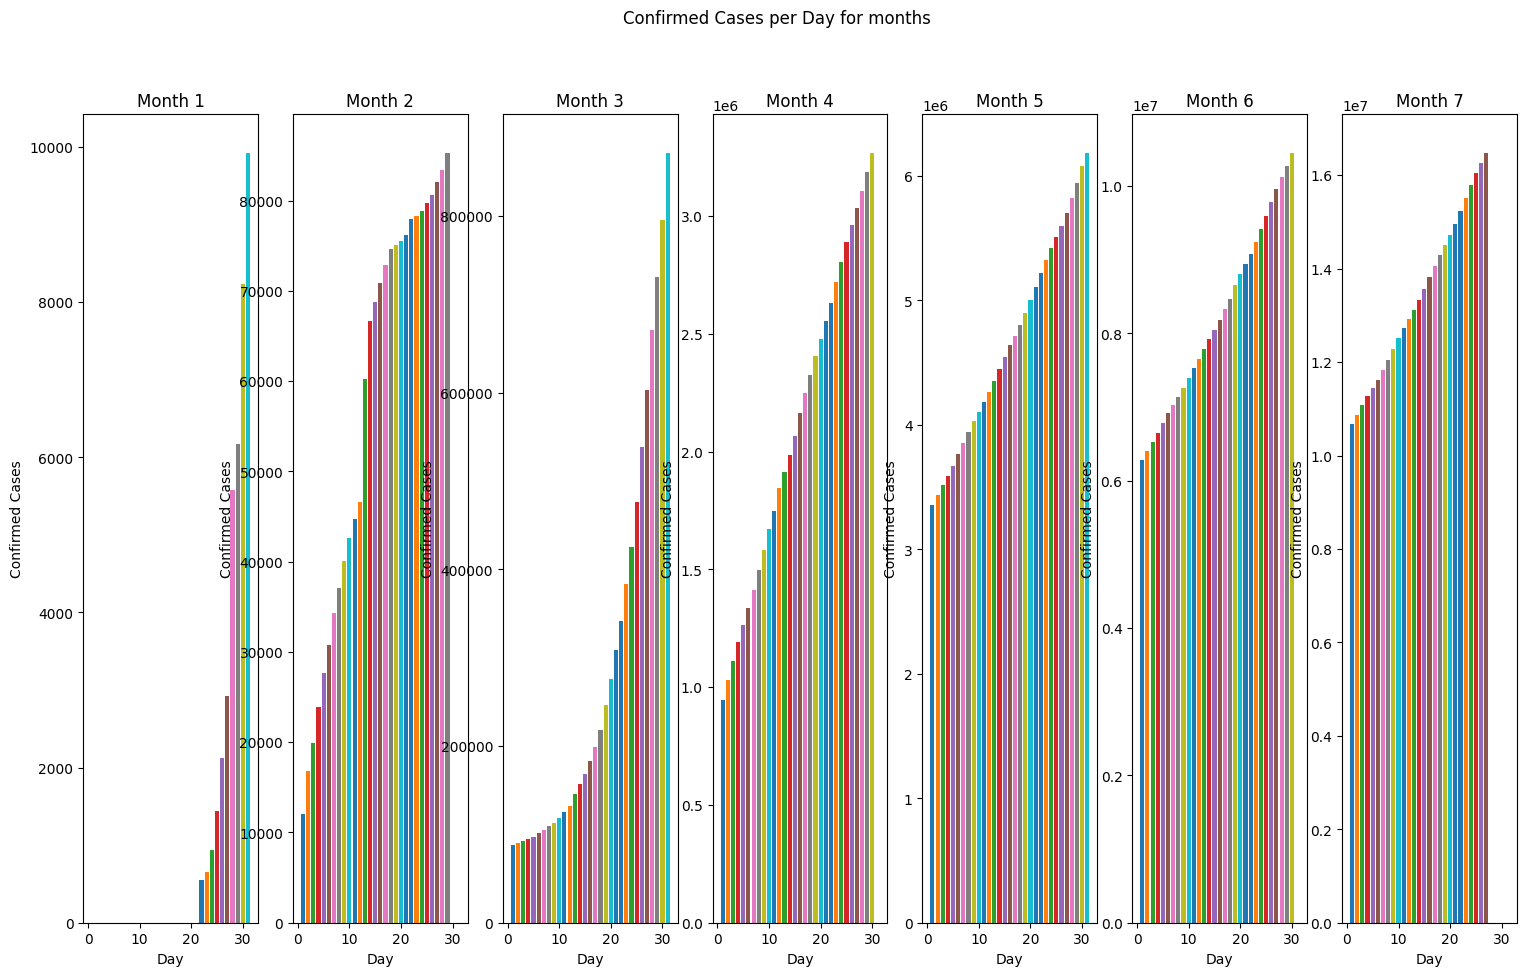

In [18]:
fig, ax = plt.subplots(1,7,figsize=(30, 10))
fig.suptitle('Confirmed Cases per Day for months')
fig.set_size_inches(18.5, 10.5)
for x in df['Date'].dt.month.unique():
  for i in df['Date'].dt.day.unique():
    ax[x-1].bar(i,df[df['Date'].dt.month==x][df[df['Date'].dt.month==x]['Date'].dt.day==i]['Confirmed'].sum())
    ax[x-1].set_xlabel("Day")
    ax[x-1].set_title(f"Month {x}")
    ax[x-1].set_ylabel("Confirmed Cases")

plt.show()

## sorted by continent

In [60]:
group=df.drop('Date',axis=1).groupby('WHO Region',as_index=1).sum()
group

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
WHO Region,,,,,,,,
Africa,AlgeriaAngolaBeninBotswanaBurkina FasoBurundiC...,21791827,439978,11193730,10158119,723540,12223,440645
Americas,Antigua and BarbudaArgentinaBahamasBarbadosBel...,402261194,19359292,157069444,225832458,8842455,342732,4468616
Eastern Mediterranean,AfghanistanBahrainDjiboutiEgyptIranIraqJordanK...,74082892,1924029,48050703,24108160,1490854,38339,1201400
Europe,AlbaniaAndorraArmeniaAustriaAzerbaijanBelarusB...,248879793,19271040,123202075,106406678,3316928,211144,1993723
South-East Asia,BangladeshBhutanBurmaIndiaIndonesiaMaldivesNep...,55118365,1458134,30030327,23629904,1835296,41349,1156933
Western Pacific,AustraliaBruneiCambodiaChinaFijiJapanLaosMalay...,26374411,932430,18861950,6580031,291879,8232,206742


In [33]:
len(group)

6

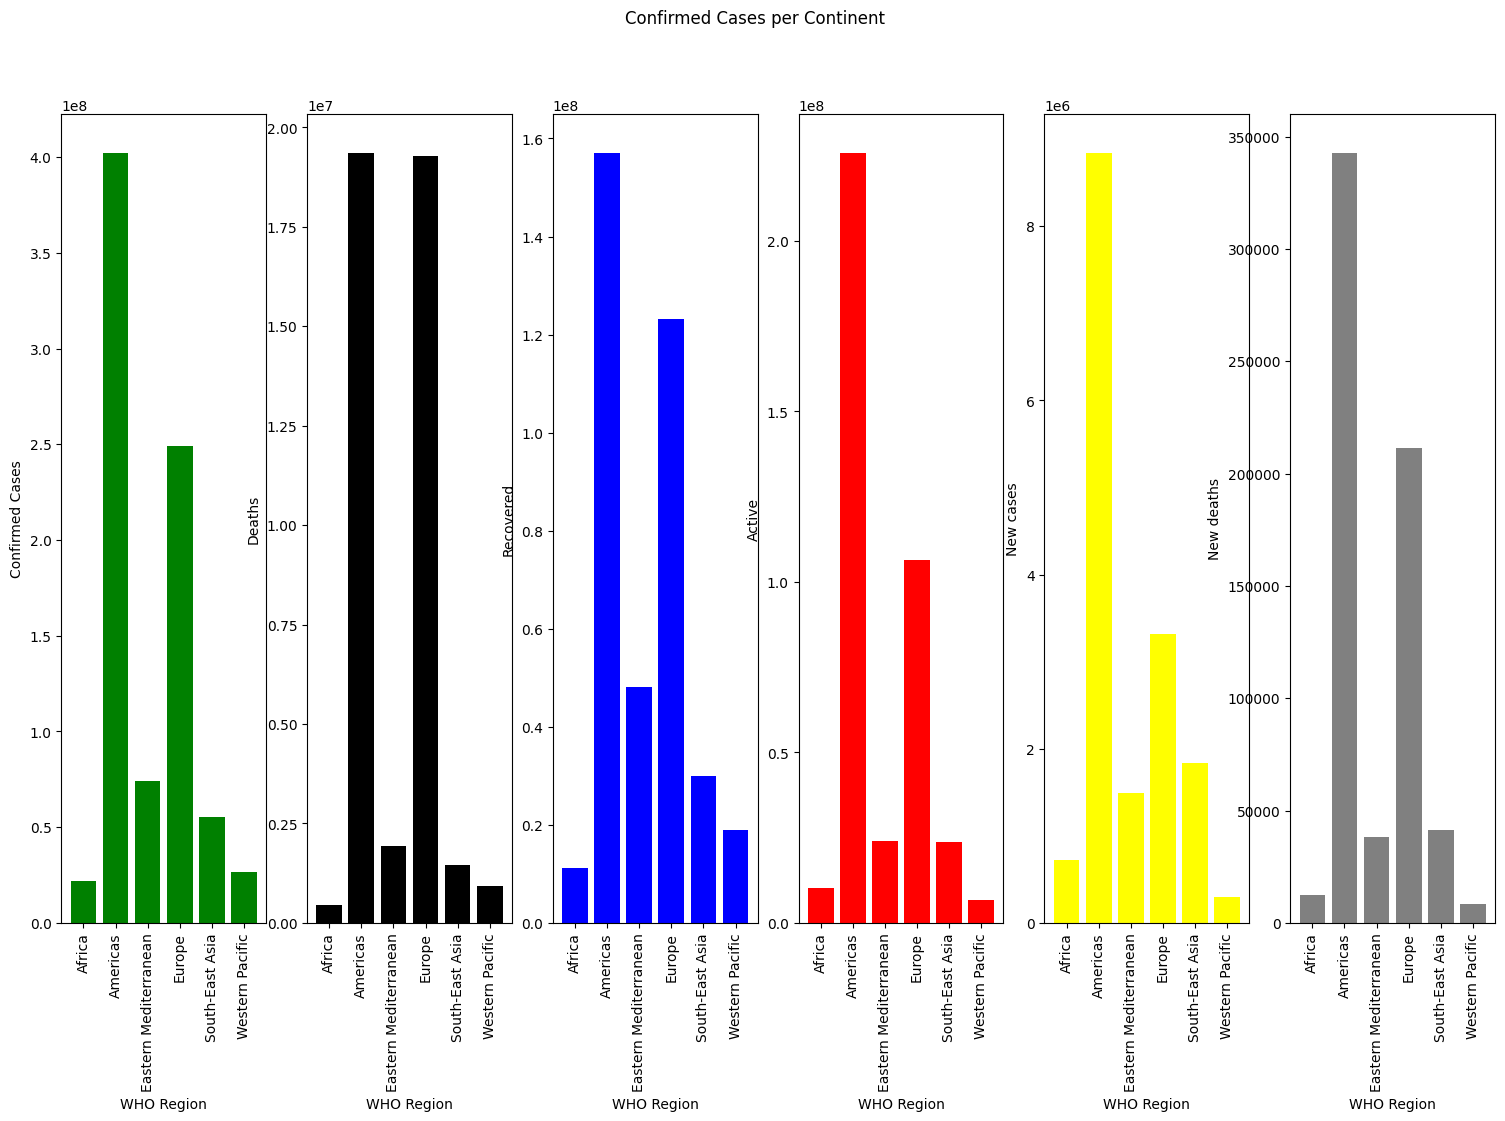

In [52]:
fig,axis=plt.subplots(1,6,figsize=(30,10))
fig.suptitle('Confirmed Cases per Continent')
fig.set_size_inches(18.5,10.5)
axis[0].bar(group["WHO Region"],group["Confirmed"],color="green")
axis[0].xaxis.set_tick_params(rotation=90)
axis[0].set_xlabel("WHO Region")
axis[0].set_ylabel("Confirmed Cases")
axis[1].bar(group["WHO Region"],group["Deaths"],color="black")
axis[1].xaxis.set_tick_params(rotation=90)
axis[1].set_xlabel("WHO Region")
axis[1].set_ylabel("Deaths")
axis[2].bar(group["WHO Region"],group["Recovered"],color="blue")
axis[2].xaxis.set_tick_params(rotation=90)
axis[2].set_xlabel("WHO Region")
axis[2].set_ylabel("Recovered")
axis[3].bar(group["WHO Region"],group["Active"],color="red")
axis[3].xaxis.set_tick_params(rotation=90)
axis[3].set_xlabel("WHO Region")
axis[3].set_ylabel("Active")
axis[4].bar(group["WHO Region"],group["New cases"],color="yellow")
axis[4].xaxis.set_tick_params(rotation=90)
axis[4].set_xlabel("WHO Region")
axis[4].set_ylabel("New cases")
axis[5].bar(group["WHO Region"],group["New deaths"],color="gray")
axis[5].xaxis.set_tick_params(rotation=90)
axis[5].set_xlabel("WHO Region")
axis[5].set_ylabel("New deaths")
plt.show()


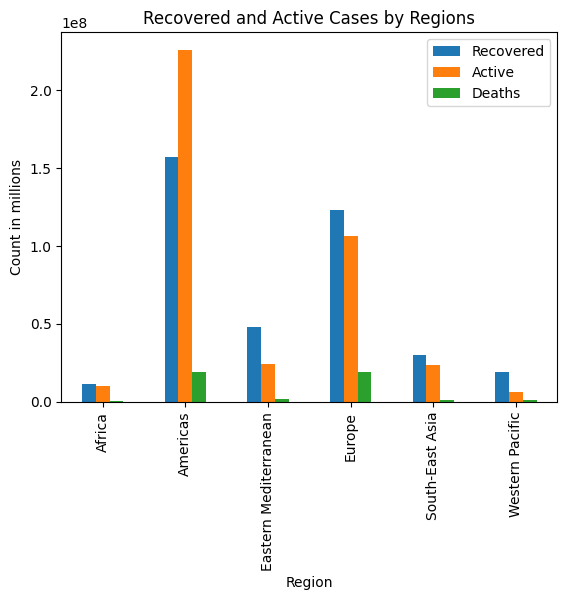

In [61]:
group[['Recovered','Active','Deaths']].plot(kind = 'bar')
plt.title('Recovered and Active Cases by Regions')
plt.xlabel('Region')
plt.ylabel('Count in millions')
plt.show()

In [62]:
import statsmodels.formula.api as sm


In [65]:
print(sm.ols(formula='Deaths~Recovered',data=group).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 Deaths   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     70.09
Date:                Sun, 08 Sep 2024   Prob (F-statistic):            0.00111
Time:                        16:11:54   Log-Likelihood:                -95.530
No. Observations:                   6   AIC:                             195.1
Df Residuals:                       4   BIC:                             194.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.499e+06   1.53e+06     -1.634      0.1

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
